___
# Decision Trees and Random Forests Guided Walkthrough

 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/kyphosis.csv')

This dataset represents the number of patients who have kyphosis and then who had an operation. 

- Kyphosis - whether or not the condition is present in the patient after the operation. For more information on this disease, check out <a href='https://www.mayoclinic.org/diseases-conditions/kyphosis/symptoms-causes/syc-20374205#:~:text=Kyphosis%20is%20an%20exaggerated%2C%20forward,the%20spinal%20bones%20over%20time.'>Mayo Clinic</a> 
- Age - patient's age (in months)
- Number - number of vertebrae involved in the operation
- Start - number of topmost vertebrae operated on 

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.shape

(81, 4)

## EDA

We'll just check out a simple pairplot for this small dataset.

How are the columns and distributions related to each other? What are your observations from this pairplot? 

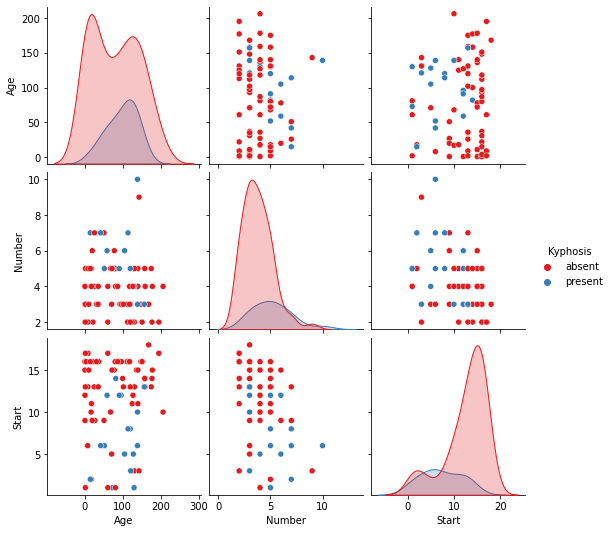

In [7]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

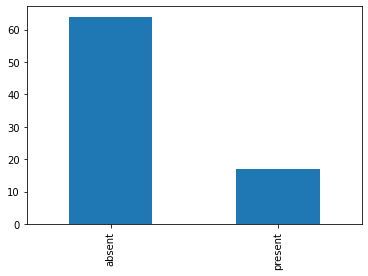

In [8]:
df.Kyphosis.value_counts().plot(kind='bar')

## Train Test Split

Let's split up the data into a training set and a test set!

In [9]:
from sklearn.model_selection import train_test_split

# we discussed the importance of splitting our dataset, now we will apply SKlearn's data split method

To learn more about the `sklearn.model_selection` library, check the documentation <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>here</a>

In [12]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [13]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [14]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)

In [16]:
X_train.head()

,Age,Number,Start
62,81,4,1
42,143,9,3
54,140,4,15
16,78,6,15
39,91,5,12


In [17]:
X_test.head()

,Age,Number,Start
30,31,3,16
0,71,3,5
22,96,3,12
31,125,2,11
18,80,5,16


In [18]:
y_train.head()

62     absent
42     absent
54     absent
16     absent
39    present
Name: Kyphosis, dtype: object

In [19]:
y_test.head()

30     absent
0      absent
22    present
31     absent
18     absent
Name: Kyphosis, dtype: object

## Decision Trees

We'll start just by training a single decision tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [23]:
dtree

DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]
```

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [25]:
predictions = dtree.predict(X_test)

# we're predicting off our test set 

In [26]:
predictions

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [27]:
X_test.shape

(25, 3)

In [29]:
len(predictions)

25

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# we'll talk about this more next week, this is just for demonstration purposes

In [31]:
print(classification_report(y_test,predictions))

# score / evaluate based on our test data and then on our predictions
# the goal is to minimize the difference between the actual result and then our predictions

              precision    recall  f1-score   support

      absent       0.76      0.84      0.80        19
     present       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



In [32]:
print(confusion_matrix(y_test,predictions))

# we're mislabeling about 7 in our test set 
# (tn, fp, fn, tp)

# [[(0,0), (0,1)
#   (1,0), (1,1)]]

[[16  3]
 [ 5  1]]


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, predictions)

0.68

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [35]:

!pip install pydot
!pip install six
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=eb8e748f88952865f69fa913389141a8d156c229de12e80771db6ae42f6d12f0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from IPython.display import Image  
from six import StringIO
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


In [39]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [43]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

graph

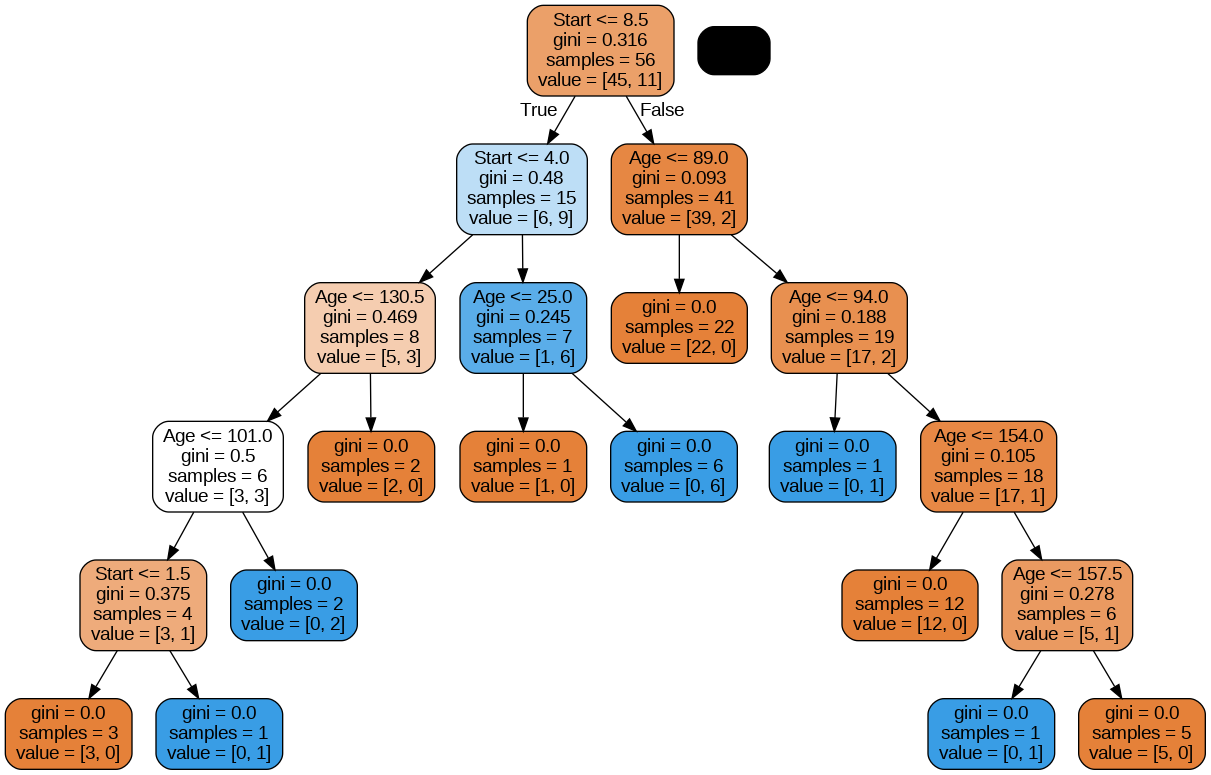

In [44]:
Image(graph[0].create_png()) 

## Random Forests

Now let's compare the decision tree model to a random forest.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc

RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [50]:
print(confusion_matrix(y_test,rfc_pred))

# how does our performance compare to a decision tree? 

[[19  0]
 [ 5  1]]


In [51]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [52]:
accuracy_score(y_test, rfc_pred)

0.8

In [ ]:
# what performs better depends on what you value. More on this next week. 
# random forests perform bettwe when the dataset is larger 